<a href="https://colab.research.google.com/github/pujitha66623/Hotel_Price_Predictor_For_Staysure_Travel./blob/main/Hotel_Price_Predictor_For_Staysure_Travel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [ ]:
np.random.seed(42)
num_samples = 1000

data = pd.DataFrame({
    'city': np.random.choice(['New York', 'Paris', 'Tokyo', 'Delhi'], num_samples),
    'star_rating': np.random.randint(1, 6, num_samples),
    'booking_date': pd.date_range(start='2023-01-01', periods=num_samples, freq='D')
})

data['price'] = (
    data['star_rating'] * 50 +
    np.random.choice([100, 150, 200, 250], num_samples) +
    np.random.normal(0, 25, num_samples)
)

data['price'] = data['price'].astype(float)
data['month'] = data['booking_date'].dt.month
data['day_of_week'] = data['booking_date'].dt.dayofweek
data.drop(columns='booking_date', inplace=True)

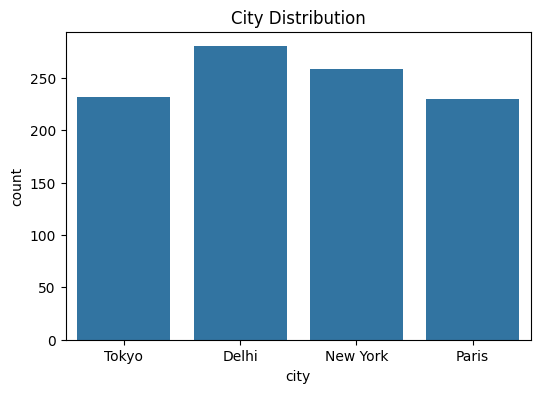

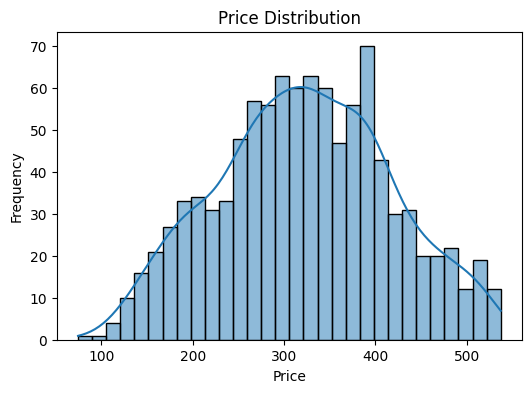

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x='city', data=data)
plt.title('City Distribution')
plt.show()

# Price distribution
plt.figure(figsize=(6, 4))
sns.histplot(data['price'], bins=30, kde=True)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

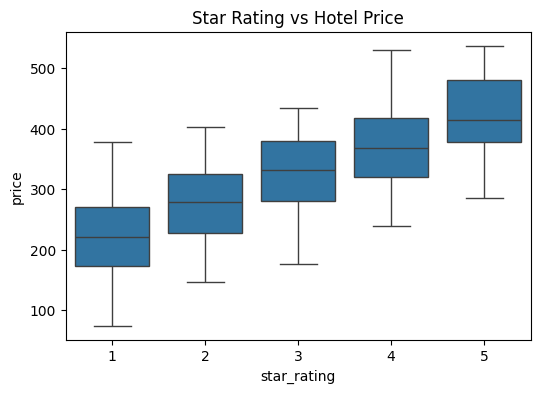

In [ ]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='star_rating', y='price', data=data)
plt.title('Star Rating vs Hotel Price')
plt.show()

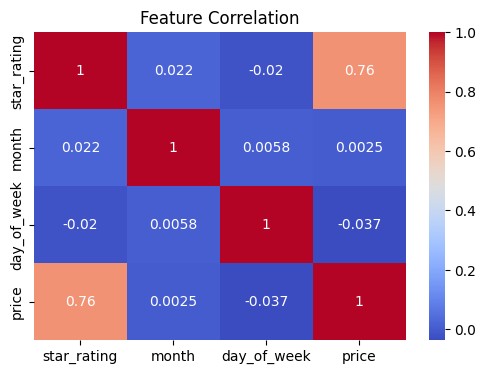

In [ ]:
plt.figure(figsize=(6, 4))
sns.heatmap(data[['star_rating', 'month', 'day_of_week', 'price']].corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation')
plt.show()

In [ ]:
X = data.drop('price', axis=1)
y = data['price']

categorical_features = ['city']
numerical_features = ['star_rating', 'month', 'day_of_week']

preprocessor = ColumnTransformer([
    ('onehot', OneHotEncoder(), categorical_features),
    ('scale', StandardScaler(), numerical_features)
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train_processed.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

history = model.fit(X_train_processed, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=0)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


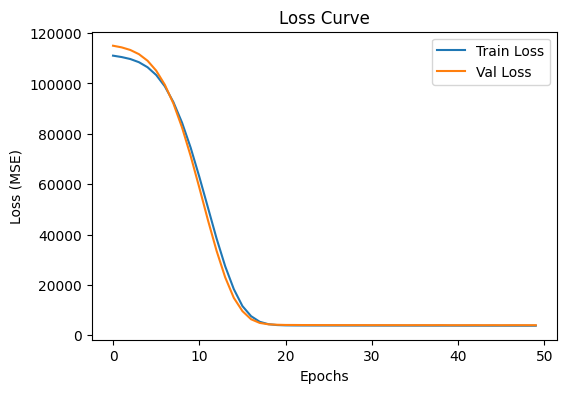

In [ ]:
plt.figure(figsize=(6, 4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.title('Loss Curve')
plt.legend()
plt.show()

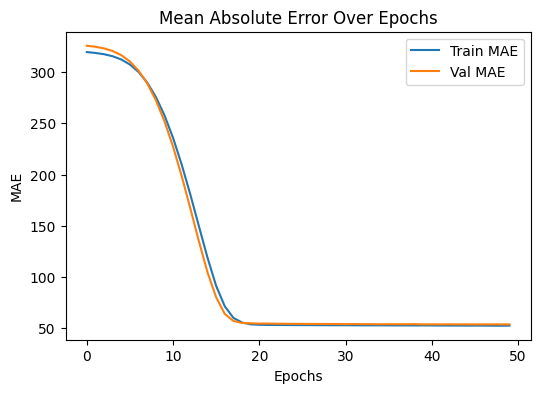

In [ ]:
plt.figure(figsize=(6, 4))
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Val MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.title('Mean Absolute Error Over Epochs')
plt.legend()
plt.show()

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
📊 Mean Absolute Error (MAE): 52.33
📉 Root Mean Squared Error (RMSE): 62.08


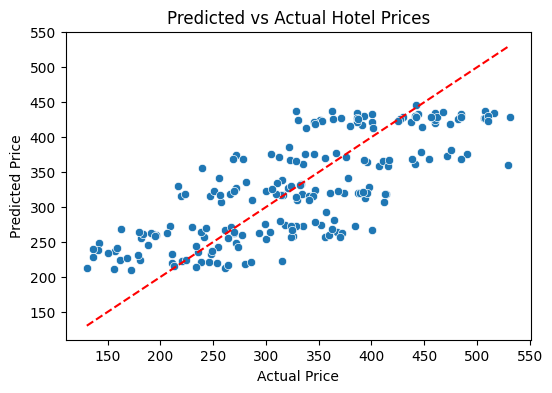

In [ ]:
y_pred = model.predict(X_test_processed)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"📊 Mean Absolute Error (MAE): {mae:.2f}")
print(f"📉 Root Mean Squared Error (RMSE): {rmse:.2f}")

# Predicted vs Actual
plt.figure(figsize=(6, 4))
sns.scatterplot(x=y_test, y=y_pred.flatten())
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Predicted vs Actual Hotel Prices')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red')
plt.show()

In [ ]:
sample = pd.DataFrame([{
    'city': 'Paris',
    'star_rating': 4,
    'month': 6,
    'day_of_week': 2
}])

sample_transformed = preprocessor.transform(sample)
predicted_price = model.predict(sample_transformed)

print(f"💰 Predicted hotel price for sample: ${predicted_price[0][0]:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
💰 Predicted hotel price for sample: $372.09
